# pandas getting data and resampling

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('walmart_stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [4]:
df.plot.line(figsize=(16,6))

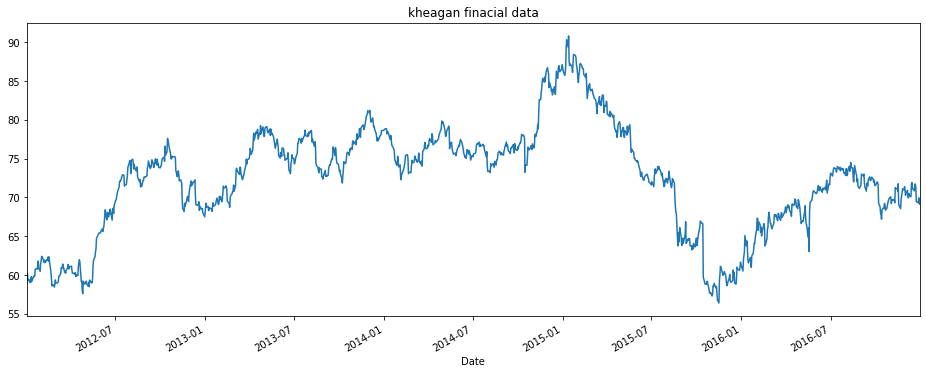

In [5]:
df['Open'].plot(title='kheagan finacial data', figsize=(16,6))

In [6]:
#########################################################
###                   best choice very important
#######################################################

df2 = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates= True )
df2.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [7]:
dfmonthly = df2.resample(rule='Q').mean()
dfmonthly.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880


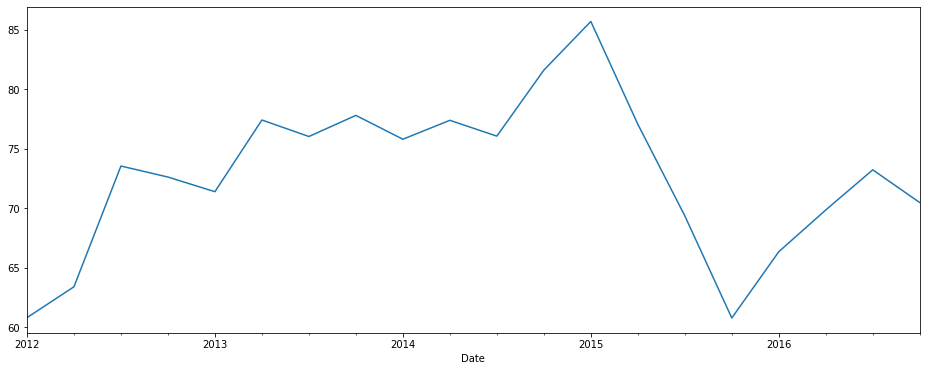

In [8]:
dfmonthly['High'].plot.line(figsize=(16,6))

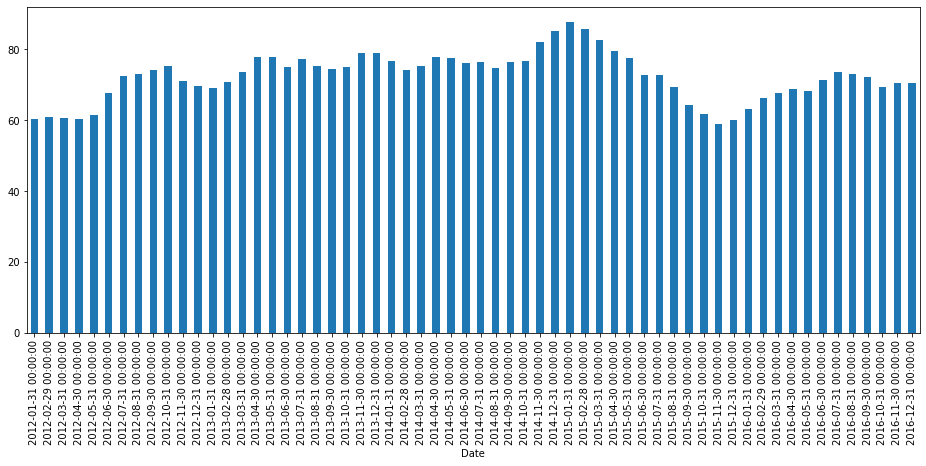

In [9]:
df['Close'].resample(rule='M').mean().plot.bar(figsize=(16,6))

# Note the   diffrence between rolling and resampling

### resample: Calculates the  mean for every month
### rolling caculates the mean for every last 30 days and not a mean for every seprate month




In [17]:
df['Close'].resample(rule = 'M').mean().head(14)

Date
2012-01-31    60.235500
2012-02-29    60.898000
2012-03-31    60.433637
2012-04-30    60.149000
2012-05-31    61.456363
2012-06-30    67.503810
2012-07-31    72.406667
2012-08-31    73.044783
2012-09-30    74.181579
2012-10-31    75.306191
2012-11-30    71.109523
2012-12-31    69.711000
2013-01-31    69.094761
2013-02-28    70.623159
Freq: M, Name: Close, dtype: float64

In [16]:
df['Close'].rolling(7).mean().head(14)

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
2012-01-10          NaN
2012-01-11    59.440000
2012-01-12    59.321429
2012-01-13    59.297143
2012-01-17    59.358572
2012-01-18    59.502857
2012-01-19    59.707143
2012-01-20    59.988571
2012-01-23    60.204285
Name: Close, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6418a65c0>,
      dtype=object)

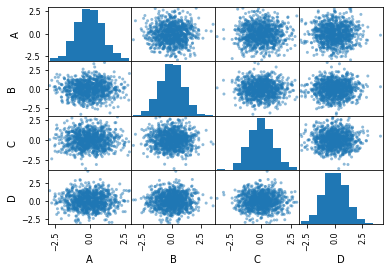

In [31]:
pd.plotting.scatter_matrix(df)